### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import dateutil
import matplotlib.pyplot as plt

In [2]:
chicago = pd.read_csv('Chicago_Crime_Detective.csv',sep=',')

C:\Users\pc\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
chicago.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012
1,1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012
2,2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012
4,4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012


### 1) What is the Month and Year of the median date in our dataset? 

In [4]:
chicago.Date = pd.to_datetime(chicago.Date)

In [5]:
chicago.Date.count()

191641

In [40]:
chicago.Date.sort_values()[95821]

Timestamp('2006-05-21 12:00:00')

In [41]:
chicago.Date.sort_values().min()

Timestamp('2001-01-01 00:01:00')

In [42]:
chicago.Date.sort_values().max()

Timestamp('2012-12-31 23:15:00')

### 2) In which month did the lowest motor vehicle thefts occur? 

In [10]:
chicago['Month'] = chicago.Date.dt.month

In [11]:
chicago.groupby('Month').ID.count()

Month
1     16047
2     13511
3     15758
4     15280
5     16035
6     16002
7     16801
8     16572
9     16060
10    17086
11    16063
12    16426
Name: ID, dtype: int64

In [12]:
chicago.groupby('Month').ID.count().min()

13511

### 3) On which weekday did most motor vehicle thefts occur?

In [14]:
chicago['WeekDay'] = chicago.Date.dt.weekday

In [15]:
chicago.groupby('WeekDay').ID.count()

WeekDay
0    27397
1    26791
2    27416
3    27319
4    29284
5    27118
6    26316
Name: ID, dtype: int64

In [16]:
chicago.groupby('WeekDay').ID.count().max()

29284

### 4) Each observation in the dataset represents a motor vehicle theft, and the Arrest variable indicates whether an arrest was later made for this theft. Which month has the largest number of motor vehicle thefts for which an arrest was made?

In [17]:
chicago.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month,WeekDay
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,12,0
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,12,0
2,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,12,0
3,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,12,0
4,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,12,0


In [18]:
chicago[chicago['Arrest']==True].groupby('Month').ID.count().max()

1435

### 5) Select the true statements

##### i)   In general, does it look like crime decreases from 2002 - 2012?

##### ii)  In general, does it look like crime increases from 2005 - 2008?

##### iii) In general, does it look like crime increases from 2009 - 2011?

In [20]:
chicago.groupby('Year').ID.count()

Year
2001    20669
2002    18753
2003    16657
2004    16862
2005    16484
2006    16098
2007    14280
2008    14445
2009    12167
2010    15497
2011    15637
2012    14092
Name: ID, dtype: int64

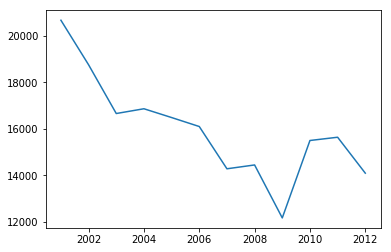

In [21]:
plt.plot(chicago.groupby('Year').ID.count())

### 6) Crimes for which more arrests were made are in the first half of the time period or the second half of the time period? 
i)  First half 
   ii) Second half

In [24]:
chicago[chicago['Arrest']==True].groupby('Year').ID.count()

Year
2001    2152
2002    2115
2003    1798
2004    1693
2005    1528
2006    1302
2007    1212
2008    1020
2009     840
2010     701
2011     625
2012     550
Name: ID, dtype: int64

### 7) For what proportion of motor vehicle thefts in 2001 was an arrest made? 
i) 0.06, ii) 0.08, iii) 0.10, iv) 0.12

In [25]:
chicago[chicago['Arrest']==True].groupby('Year').ID.count()

Year
2001    2152
2002    2115
2003    1798
2004    1693
2005    1528
2006    1302
2007    1212
2008    1020
2009     840
2010     701
2011     625
2012     550
Name: ID, dtype: int64

In [26]:
chicago[chicago['Arrest']==False].groupby('Year').ID.count()

Year
2001    18517
2002    16638
2003    14859
2004    15169
2005    14956
2006    14796
2007    13068
2008    13425
2009    11327
2010    14796
2011    15012
2012    13542
Name: ID, dtype: int64

In [27]:
from math import *
round(2152/18517,2)

0.12

### 8) For what proportion of motor vehicle thefts in 2007 was an arrest made? 
(round your answer to 2 decimal places) 

In [28]:
chicago[chicago['Arrest']==True].groupby('Year').ID.count()

Year
2001    2152
2002    2115
2003    1798
2004    1693
2005    1528
2006    1302
2007    1212
2008    1020
2009     840
2010     701
2011     625
2012     550
Name: ID, dtype: int64

In [29]:
chicago[chicago['Arrest']==False].groupby('Year').ID.count()

Year
2001    18517
2002    16638
2003    14859
2004    15169
2005    14956
2006    14796
2007    13068
2008    13425
2009    11327
2010    14796
2011    15012
2012    13542
Name: ID, dtype: int64

In [30]:
round(1212/13068,2)

0.09

### 9) Which locations are the top five locations for motor vehicle thefts, excluding the "Other" category? 
Bank, 
Gas Station, 
Hotel/Motel, 
Street, 
Car Wash, 
Restaurant, 
Parking Lot/Garage (Non-Residential), 
Alley, 
Driveway (Residential), 
Vacant Lot/Land

In [33]:
chicago.LocationDescription.value_counts().head(6)

STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
OTHER                               4573
ALLEY                               2308
GAS STATION                         2111
DRIVEWAY - RESIDENTIAL              1675
Name: LocationDescription, dtype: int64

### 10) Create a subset of your data, only taking observations for which the theft happened in one of these five locations, and call this new data set "Top5". How many observations are in Top5?

In [35]:
chicago.LocationDescription.value_counts().head(6).sum()-4573

177510

### 11) On which day of the week do the most motor vehicle thefts at gas stations happen?
Monday, 
Tuesday, 
Wednesday, 
Thursday, 
Friday, 
Saturday, 
Sunday

In [36]:
chicago.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month,WeekDay
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,12,0
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,12,0
2,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,12,0
3,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,12,0
4,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,12,0


In [37]:
chicago[chicago.LocationDescription == 'GAS STATION'].WeekDay.value_counts()

5    338
6    336
4    332
3    282
0    280
2    273
1    270
Name: WeekDay, dtype: int64

In [38]:
chicago[chicago.LocationDescription == 'GAS STATION'].WeekDay.value_counts().max()

338